**Import Library**

In [320]:
# !pip install --upgrade numpy scipy
# !pip install PyPortfolioOpt
# !pip install quantstats

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from pypfopt.plotting import plot_efficient_frontier
import quantstats as qs

**Read Files**

In [363]:
# set files
SET_expected_return = pd.read_csv('../Data/top_10_returns_SET1.csv')
SET_df = pd.read_csv('../Data/SET_main.csv')
set_index = pd.read_csv('../Data/set_index.csv')
set_predict = pd.read_csv('../Data/predictions_set.csv')
# sp500 files 
sp500_expected_return = pd.read_csv('../Data/top_10_returns_sp500.csv')
sp500_df = pd.read_csv('../Data/sp500_main.csv')
sp500_index = pd.read_csv('../Data/sp500_index.csv')
sp500_predict = pd.read_csv('../Data/predictions_sp500.csv')

In [371]:
SET_df.shape, sp500_df.shape

((2662, 21), (2755, 21))

In [395]:
sp500_predict

,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,MA,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
0,168.70709,127.845950,82.661910,548.73320,126.486950,126.827270,272.24158,140.58736,410.47510,351.42664,287.17650,344.02350,39.579720,119.247696,141.30860,269.20820,474.99927,214.08943,50.240760,94.357864
1,168.79420,127.673874,82.789700,548.91785,126.108826,126.506355,272.25640,141.21936,410.12656,352.21228,288.65120,343.89944,39.601240,118.762010,141.09558,270.87082,473.53116,214.94264,50.175343,94.232480
2,168.74019,127.620300,82.971640,549.01764,125.744286,126.190155,272.76947,141.99113,409.24976,353.34120,291.02853,343.70972,39.643730,118.405690,140.77885,271.96503,471.57715,215.75798,50.094753,94.190346
3,168.62749,127.934204,83.201050,549.20013,125.745125,126.250490,273.57720,142.84416,407.86395,354.62625,294.35165,343.70148,39.737620,118.248340,140.43492,272.86942,469.10382,216.57470,50.000090,94.146950
4,168.50822,128.587940,83.458210,549.74005,126.181760,126.769100,274.58560,143.73660,406.35180,355.99680,297.85233,344.01523,39.879630,118.345830,140.16106,273.86978,467.31110,217.35730,49.910667,93.903890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,202.43347,200.042590,126.878685,904.86230,178.926650,178.665650,379.98850,241.81816,583.84030,458.52386,572.43353,424.66430,65.090515,178.941210,168.34813,335.77377,604.07060,273.63560,79.078384,108.466560
356,203.62430,202.308260,126.885280,907.69650,179.302100,179.061890,381.27567,240.93156,585.82180,458.06616,579.07904,426.44420,65.083210,178.661940,168.37479,337.69247,604.35110,273.51935,79.477394,107.851030
357,204.74564,205.058350,127.019210,910.42610,179.904190,179.688810,382.24990,240.42523,588.02490,457.71478,586.00240,428.52216,65.083890,178.631130,168.13310,341.15936,602.73780,273.26970,79.861080,107.162040
358,205.83632,207.939830,127.262700,912.94086,180.680420,180.492340,382.91577,239.93178,590.09620,457.18375,592.14040,430.80646,65.083900,178.788000,167.57724,345.86768,599.64374,272.86795,80.156136,106.427704


In [393]:
set_predict

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,HMPRO.BK,INTUCH.BK,IVL.BK,KBANK.BK,KTB.BK,MINT.BK,PTT.BK,PTTEP.BK,SCC.BK,TRUE.BK,TTB.BK
0,194.54694,73.906006,140.13388,25.729970,212.24990,66.967370,21.423687,73.876030,98.990160,14.784009,68.314316,36.375813,128.102520,18.531807,33.728430,32.143284,149.92610,320.72970,7.037128,1.612354
1,194.12498,74.014100,140.11244,25.696152,210.73198,66.832530,21.289135,72.842430,99.076950,14.802543,68.204810,36.495640,127.622025,18.572819,33.785683,32.154020,149.59402,319.10065,6.983981,1.603547
2,193.15800,74.144005,140.23473,25.639353,210.07123,66.416910,21.046394,71.306160,98.600730,14.798686,68.136020,36.480152,127.215100,18.601261,33.750813,32.148750,149.01730,317.49954,6.876437,1.595010
3,191.80267,74.219810,140.40167,25.563421,209.84225,65.806720,20.721247,69.548930,97.755066,14.788376,68.049965,36.415115,126.973305,18.609917,33.566067,32.169044,148.36911,316.26645,6.745090,1.587982
4,190.31432,74.234260,140.61166,25.483755,209.36983,65.225716,20.380550,68.077835,96.520800,14.778134,67.882484,36.234200,126.880080,18.620468,33.282913,32.163868,147.56688,315.22327,6.619324,1.584323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,261.20636,64.754770,136.82692,23.980137,195.58722,65.405910,24.451797,65.657450,127.513664,10.603102,96.326120,25.820932,159.375980,20.069790,27.229252,36.233570,138.82002,228.94618,11.399396,1.948011
356,262.69250,64.828285,137.29997,23.894115,196.90558,65.616450,24.495451,65.622314,126.724050,10.625249,96.378020,25.732008,160.140350,20.079048,27.333178,36.042458,138.50858,227.80950,11.411268,1.944487
357,264.10437,64.965576,137.97281,23.883224,198.27354,66.133530,24.573368,65.739760,126.152490,10.670270,96.699350,25.586288,161.297040,20.191510,27.593306,35.922010,138.30325,227.21870,11.508501,1.943484
358,265.76000,65.089745,138.71931,23.893790,199.29118,66.568070,24.645052,65.843510,125.757030,10.713825,97.310700,25.536823,162.682250,20.363073,27.779987,35.861763,138.20232,227.13013,11.621164,1.950667


In [367]:
SET_df.head(5)

,Date,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,...,INTUCH.BK,IVL.BK,KBANK.BK,KTB.BK,MINT.BK,PTT.BK,PTTEP.BK,SCC.BK,TRUE.BK,TTB.BK
0,2014-01-02,115.707695,13.004045,112.167664,8.865041,68.680244,33.136929,22.704105,31.580967,4.015339,...,36.063667,14.913610,107.741776,9.801532,15.467829,16.889353,93.353264,263.643036,5.398062,1.198794
1,2014-01-03,121.276527,12.870900,113.856918,8.824374,69.914032,33.136929,22.704105,31.159885,3.846470,...,36.908916,14.837523,111.814484,9.864767,15.223605,16.519508,92.148727,262.951050,5.318678,1.186436
2,2014-01-06,124.370323,12.648986,117.235466,9.678345,69.091530,33.344040,21.773605,31.580967,3.696364,...,37.190655,14.913610,116.257446,9.991237,16.363337,16.272951,89.137291,266.411011,5.477446,1.217332
3,2014-01-07,129.939133,13.447869,120.276161,9.556350,68.474625,33.965351,22.704105,32.844200,3.771417,...,38.176777,15.446239,119.959915,10.244180,17.096024,17.320827,92.449844,269.178833,5.636212,1.229691
4,2014-01-08,127.464096,12.870900,119.938301,9.312360,67.446480,33.551147,22.145803,32.633663,3.790180,...,38.035904,15.978869,119.959915,9.991237,16.526155,17.567392,94.256668,271.254791,5.398062,1.248229


In [361]:
sp500_df.head(5)

,Date,AAPL,AMZN,AVGO,COST,GOOG,GOOGL,HD,JPM,LLY,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
0,2014-01-02,17.234297,19.898500,3.961283,94.369179,27.624825,27.755241,63.568802,43.285351,40.585152,...,54.545769,31.058565,0.373966,32.008656,58.940643,10.006667,63.013271,51.132057,21.054295,62.739441
1,2014-01-03,16.855730,19.822001,3.976331,93.952660,27.423307,27.552771,63.468048,43.619984,40.881153,...,54.396221,30.849604,0.369486,31.923794,58.874783,9.970667,63.461128,51.166771,20.984922,62.588505
2,2014-01-06,16.947645,19.681499,3.949246,93.239731,27.729059,27.859968,62.855755,43.872814,41.225163,...,57.028294,30.197683,0.374438,31.796507,59.013802,9.800000,62.734417,50.859058,20.867523,62.682835
3,2014-01-07,16.826441,19.901501,3.986865,92.807159,28.263626,28.397058,63.165791,43.367157,40.953148,...,57.746128,30.431717,0.380568,32.118965,59.584633,9.957333,64.652641,51.247742,20.931564,63.569683
4,2014-01-08,16.933004,20.096001,4.046303,91.357330,28.322445,28.456152,63.499035,43.776134,40.889141,...,58.055202,29.888441,0.385756,32.008652,58.721100,10.085333,63.900585,51.411995,20.766140,63.362122


In [387]:
# Merge the two files 
df = pd.merge(SET_df, sp500_df,on='Date', how='inner').fillna(0)

In [389]:
# set the date into index
df = df.set_index('Date')

In [391]:
# calculating daily return 
daily_returns = df.pct_change()
daily_returns

,ADVANC.BK,AOT.BK,BBL.BK,BDMS.BK,BH.BK,CPALL.BK,CPF.BK,CPN.BK,DELTA.BK,HMPRO.BK,...,META,MSFT,NVDA,ORCL,PG,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.048128,-0.010239,0.015060,-0.004587,0.017964,0.000000,0.000000,-0.013333,-0.042056,-0.029240,...,-0.002742,-0.006728,-0.011980,-0.002651,-0.001117,-0.003598,0.007107,0.000679,-0.003295,-0.002406
2014-01-06,0.025510,-0.017242,0.029674,0.096774,-0.011764,0.006250,-0.040984,0.013514,-0.039024,-0.006024,...,0.048387,-0.021132,0.013401,-0.003987,0.002361,-0.017117,-0.011451,-0.006014,-0.005594,0.001507
2014-01-07,0.044776,0.063158,0.025937,-0.012605,-0.008929,0.018633,0.042735,0.040000,0.020305,0.024243,...,0.012587,0.007750,0.016373,0.010141,0.009673,0.016054,0.030577,0.007642,0.003069,0.014148
2014-01-08,-0.019048,-0.042904,-0.002809,-0.025532,-0.015015,-0.012195,-0.024590,-0.006410,0.004975,-0.017752,...,0.005352,-0.017852,0.013631,-0.003435,-0.014493,0.012855,-0.011632,0.003205,-0.007903,-0.003265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-03,0.034965,0.004049,0.006689,0.029703,0.014354,0.024096,0.012552,0.004149,-0.006579,0.025907,...,0.035120,0.000510,0.011758,0.008158,-0.023817,-0.015878,-0.005407,-0.011495,0.009391,-0.001527
2024-12-04,-0.023649,0.004738,0.006645,-0.009615,-0.004717,0.003922,-0.004132,0.000000,0.000000,-0.020202,...,0.000212,0.014425,0.034793,0.028979,-0.001767,0.018525,0.009187,-0.009936,0.010052,-0.028809
2024-12-06,0.020761,-0.008130,0.003300,-0.009709,-0.004739,-0.015625,0.000000,-0.004132,-0.003311,0.000000,...,0.016276,0.014060,-0.018535,0.018598,-0.007367,0.087419,-0.100149,0.003582,0.013235,-0.006213


**Expected Return**

In [191]:
ER = expected_returns.mean_historical_return(SET_df) 
ER

ADVANC.BK    0.090554
AOT.BK       0.158521
BBL.BK       0.028553
BDMS.BK      0.104204
BH.BK        0.106260
CPALL.BK     0.062733
CPF.BK       0.004873
CPN.BK       0.061821
DELTA.BK     0.409868
HMPRO.BK     0.069985
INTUCH.BK    0.102956
IVL.BK       0.054047
KBANK.BK     0.034725
KTB.BK       0.074828
MINT.BK      0.056005
PTT.BK       0.063171
PTTEP.BK     0.028031
SCC.BK      -0.039113
TRUE.BK      0.077735
TTB.BK       0.040872
dtype: float64

**Calculate Covariance**

In [330]:
cov_set = risk_models.sample_cov(SET_df)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

**EfficientFrontier**

In [222]:
# Calculating EfficientFrontier 
ef = EfficientFrontier(ER, cov_set)

*Maximum sharpe ratio*

In [224]:
# Optimizing weights for Sharpe ratio maximization 
weights_max = ef.max_sharpe()
clean_weights_max = ef.clean_weights()

In [234]:
# Printing optimized weights and expected performance for portfolio
total_pct = 0
optimal_weight_max = {}
for key, value in clean_weights_max.items():
    if value > 0:
        optimal_weight_max[key] = value
        print(f"Stock: {key}, Weights: {value}")
        total_pct = total_pct + value
        print(f'Total percentage: {total_pct:.2f}')
        

Stock: ADVANC.BK, Weights: 0.05134
Total percentage: 0.05
Stock: AOT.BK, Weights: 0.31124
Total percentage: 0.36
Stock: BDMS.BK, Weights: 0.14916
Total percentage: 0.51
Stock: BH.BK, Weights: 0.06004
Total percentage: 0.57
Stock: DELTA.BK, Weights: 0.25027
Total percentage: 0.82
Stock: INTUCH.BK, Weights: 0.17794
Total percentage: 1.00


In [236]:
optimal_weight_max

{'ADVANC.BK': 0.05134,
 'AOT.BK': 0.31124,
 'BDMS.BK': 0.14916,
 'BH.BK': 0.06004,
 'DELTA.BK': 0.25027,
 'INTUCH.BK': 0.17794}

In [246]:
optimal_weight_max = np.array(list(optimal_weight_max.values()))

In [208]:
expected_return, risk, sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 19.7%
Annual volatility: 20.1%
Sharpe Ratio: 0.98


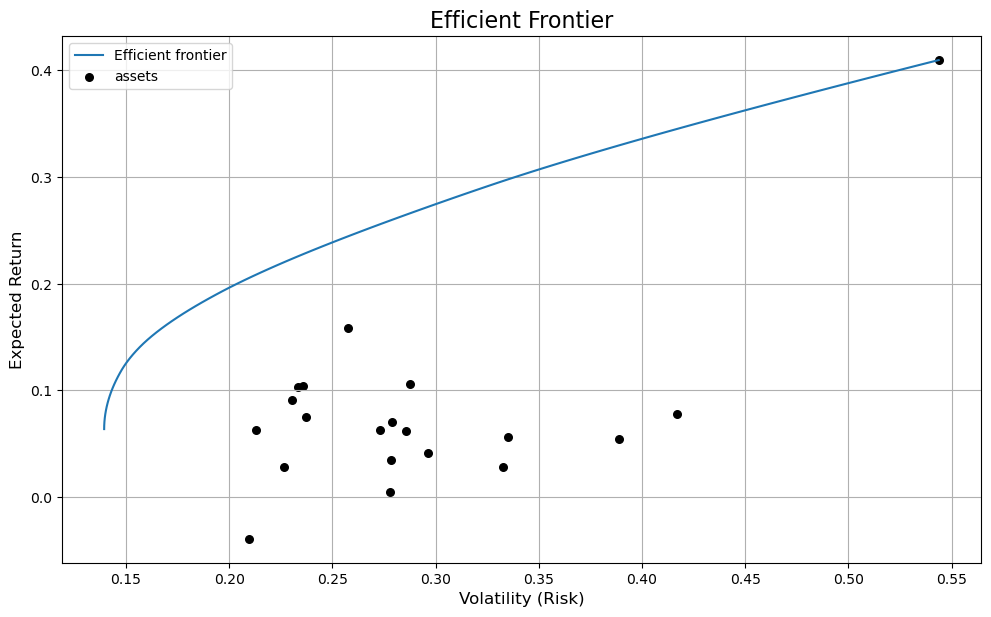

In [276]:
# Create a new EfficientFrontier instance for plotting
ef_for_plot = EfficientFrontier(ER, cov_set)

plt.figure(figsize=(10, 6))
ax = plot_efficient_frontier(ef_for_plot, show_assets=True)
plt.title("Efficient Frontier", fontsize=16)
plt.xlabel("Volatility (Risk)", fontsize=12)
plt.ylabel("Expected Return", fontsize=12)
plt.grid()
plt.show()

*Minimum votality portfolio*

In [294]:
# Calculating EfficientFrontier 
ef_min = EfficientFrontier(ER, cov_set)

In [296]:
# Optimizing weights for Minimum votality portfolio 
weights_min = ef_min.min_volatility()
clean_weights_min = ef_min.clean_weights()

In [300]:
# Printing optimized weights and expected performance for portfolio
total_pct = 0
optimal_weight_min = {}
for key, value in clean_weights_min.items():
    if value > 0:
        optimal_weight_min[key] = value
        print(f"Stock: {key}, Weights: {value}")
        total_pct = total_pct + value
        print(f'Total percentage: {total_pct:.2f}')

Stock: ADVANC.BK, Weights: 0.12401
Total percentage: 0.12
Stock: AOT.BK, Weights: 0.01102
Total percentage: 0.14
Stock: BBL.BK, Weights: 0.13462
Total percentage: 0.27
Stock: BDMS.BK, Weights: 0.12716
Total percentage: 0.40
Stock: BH.BK, Weights: 0.05782
Total percentage: 0.45
Stock: CPALL.BK, Weights: 0.19838
Total percentage: 0.65
Stock: CPF.BK, Weights: 0.03217
Total percentage: 0.69
Stock: DELTA.BK, Weights: 0.02644
Total percentage: 0.71
Stock: INTUCH.BK, Weights: 0.08918
Total percentage: 0.80
Stock: KTB.BK, Weights: 0.02371
Total percentage: 0.82
Stock: SCC.BK, Weights: 0.17548
Total percentage: 1.00


In [302]:
optimal_weight_min

{'ADVANC.BK': 0.12401,
 'AOT.BK': 0.01102,
 'BBL.BK': 0.13462,
 'BDMS.BK': 0.12716,
 'BH.BK': 0.05782,
 'CPALL.BK': 0.19838,
 'CPF.BK': 0.03217,
 'DELTA.BK': 0.02644,
 'INTUCH.BK': 0.08918,
 'KTB.BK': 0.02371,
 'SCC.BK': 0.17548}

In [304]:
optimal_weight_min = np.array(list(optimal_weight_min.values()))

In [306]:
expected_return, risk, sharpe = ef_min.portfolio_performance(verbose=True)

Expected annual return: 6.4%
Annual volatility: 13.9%
Sharpe Ratio: 0.46


In [ ]:
# Creating benchmark 
benchmark = set_index

In [324]:
# New reports comparing the optimized portfolio to the first portfolio constructed
qs.reports.full(optimized_portfolio, benchmark = sp500_index)

NameError: name 'optimized_portfolio' is not defined